In [1]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import mapping, LineString
from shapely.ops import unary_union
import matplotlib.pyplot as plt

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('../'))
if module_path not in sys.path:
    sys.path.append(module_path)

<AxesSubplot: >

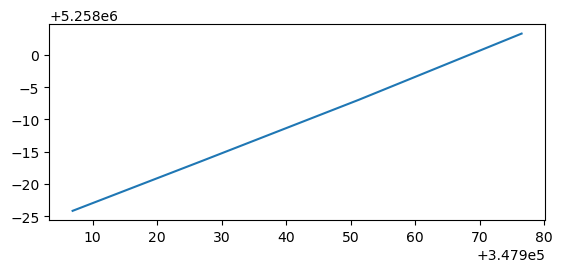

In [3]:
shp_data = gpd.read_file(r"inp1.geojson")
shp_data.plot()

In [4]:
from gkit.gops import interpolate_with_delta, cut, get_pts_on_orthogonal_line_and_orthogonal_line

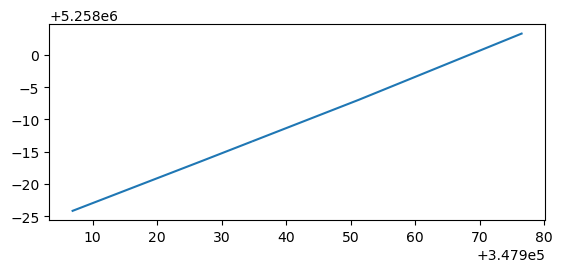

In [6]:
shp_data = gpd.read_file(r"C:\Users\Fuzail.Palnak\UHD\tt1.geojson")
data = cut(shp_data.geometry[0], 30)
gdf_list = []
for d in data:
    gdf = gpd.GeoDataFrame(geometry=[d], crs=shp_data.crs)
    gdf_list.append(gdf)
cut_gdf = gpd.GeoDataFrame(pd.concat(gdf_list, ignore_index=True), crs=shp_data.crs)
cut_gdf.plot()
plt.show()

C:\Users\Fuzail.Palnak\UHD\openSource\gtkit\gkit\gops.py:118: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  boundary = [line.boundary[1]]


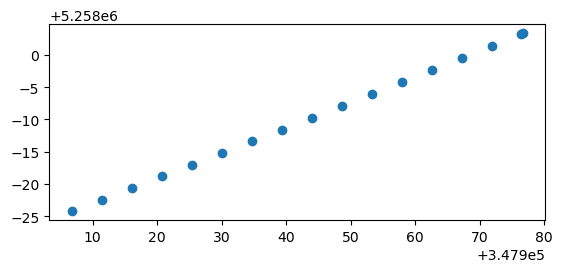

In [7]:
data = interpolate_with_delta(shp_data.geometry[0], delta=5)
gdf_list = []
for d in data:
    gdf = gpd.GeoDataFrame(geometry=[d], crs=shp_data.crs)
    gdf_list.append(gdf)
interpol_gdf = gpd.GeoDataFrame(pd.concat(gdf_list, ignore_index=True), crs=shp_data.crs)
interpol_gdf.plot()
plt.show()

C:\Users\Fuzail.Palnak\UHD\openSource\gtkit\gkit\gops.py:141: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  ab.parallel_offset(width / 2, "left").boundary[1],
C:\Users\Fuzail.Palnak\UHD\openSource\gtkit\gkit\gops.py:142: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  ab.parallel_offset(width / 2, "right").boundary[0],


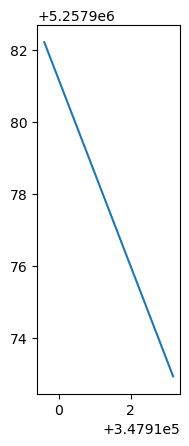

In [8]:
data = get_pts_on_orthogonal_line_and_orthogonal_line(interpol_gdf.geometry[0], interpol_gdf.geometry[1], width=10)
ortho_gdf = gpd.GeoDataFrame(geometry=[data], crs=shp_data.crs)
ortho_gdf.plot()
plt.show()